<a href="https://colab.research.google.com/github/edwardliu24/edwardliu24.github.io/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and dogs images classification

In this project, we will classify the images of dogs and cats using CNN models.

## Preparation

Import all the modules we need.

In [1]:
import os
from tensorflow.keras import utils 
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

Import the dataset.

In [2]:
# location of data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# download the data and extract it
path_to_zip = utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# construct paths
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# parameters for datasets
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# construct train and validation datasets 
train_dataset = utils.image_dataset_from_directory(train_dir,
                                                   shuffle=True,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE)

validation_dataset = utils.image_dataset_from_directory(validation_dir,
                                                        shuffle=True,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMG_SIZE)

# construct the test dataset by taking every 5th observation out of the validation dataset
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

68616192/68606236 [==============================] - 2s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Create a visualiation function to view the data briefly.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


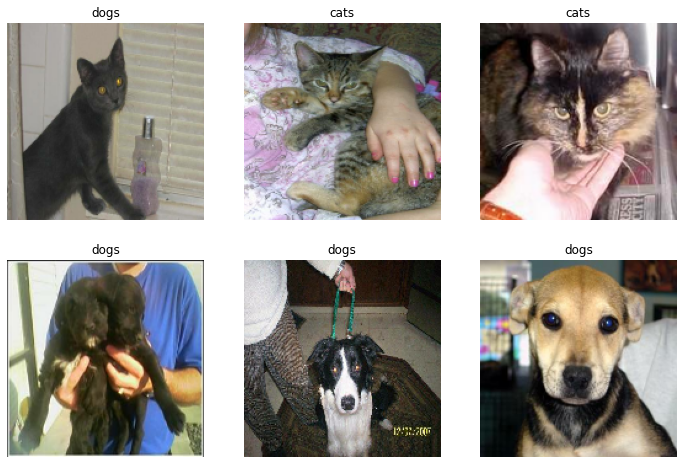

In [3]:
def dataset_visualiztion(dataset):
  class_names = dataset.class_names
  plt.figure(figsize=(12, 8))
  p = np.random.randint(1, 20)
  for images, labels in train_dataset.take(p):
    for i in range(6):
      ax = plt.subplot(2, 3, i + 1)
      if i <= 2:
        plt.imshow(images[labels==0][i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
      else:
        plt.imshow(images[labels==1][i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

dataset_visualiztion(train_dataset)


Prefetch the dataset.

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Use a lable iterator to count the numbers of cats and dogs images.

In [5]:
labels_iterator= train_dataset.unbatch().map(lambda image, label: label).as_numpy_iterator()

In [6]:
cat_num = 0
dog_num = 0
for i in labels_iterator:
  if i == 0:
    cat_num += 1
  elif i == 1: 
    dog_num += 1

cat_num,dog_num

(1000, 1000)

We can see that we have an equal number of cat and dogs images, which serve as the baseline 50 percent.

## Model1

Use the keras module to construct a model, with 2 Conv2d layers, two MaxPooling2D layers, one Flatten layer,  one Dense layer, and a Dropout layer

In [7]:
model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(2)
])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dropout (Dropout)           (None, 46208)             0

In [9]:
model1.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model1.fit(train_dataset, 
            epochs=20, 
            validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 16s 80ms/step - loss: 37.9397 - accuracy: 0.4995 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 5s 80ms/step - loss: 0.6534 - accuracy: 0.5870 - val_loss: 0.7127 - val_accuracy: 0.5309
Epoch 3/20
63/63 [==============================] - 5s 73ms/step - loss: 0.6151 - accuracy: 0.6450 - val_loss: 0.7786 - val_accuracy: 0.5111
Epoch 4/20
63/63 [==============================] - 5s 74ms/step - loss: 0.5569 - accuracy: 0.6885 - val_loss: 0.7931 - val_accuracy: 0.5285
Epoch 5/20
63/63 [==============================] - 6s 95ms/step - loss: 0.4586 - accuracy: 0.7740 - val_loss: 0.9013 - val_accuracy: 0.5334
Epoch 6/20
63/63 [==============================] - 5s 77ms/step - loss: 0.3916 - accuracy: 0.8155 - val_loss: 1.0219 - val_accuracy: 0.5396
Epoch 7/20
63/63 [==============================] - 5s 76ms/step - loss: 0.3455 - accuracy: 0.8395 - val_loss: 1.2504 - val_accuracy: 0.5309
Epoch 8/20


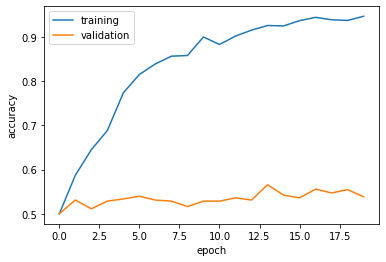

In [10]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

Observation1: the accuracy of model1 stabilized between **50% and 55%** during training  
Observation2: the baseline is 50 percent, which I do 5 percent better.  
Observation3: overfitting is observed since the training accuracy is way more higher.

## Model2

Based on model1, we add data augmentation to the model, which is randomflip and randomrotation.

First demonstrate the randomflip and randomrotation

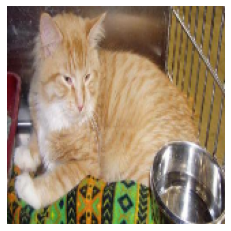

In [11]:
## create original image
for images,labels in train_dataset.take(1):
  example = images[1]
  plt.imshow(example.numpy().astype("uint8"))
  plt.axis("off")

(-0.5, 159.5, 159.5, -0.5)

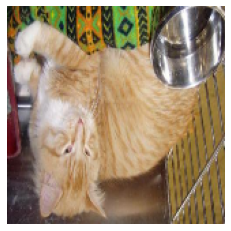

In [12]:
## Create flipped image
flip = layers.RandomFlip()
example_flipped = flip(example,training = True)
plt.imshow(example_flipped.numpy().astype("uint8"))
plt.axis("off")

(-0.5, 159.5, 159.5, -0.5)

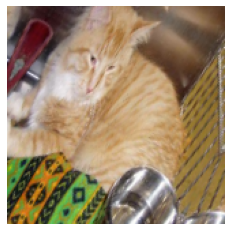

In [13]:
## Create rotated image with parameter 0.1
rotate1 = layers.RandomRotation(0.1)
example_rotated1 = rotate1(example, training = True)
plt.imshow(example_rotated1.numpy().astype("uint8"))
plt.axis("off")

(-0.5, 159.5, 159.5, -0.5)

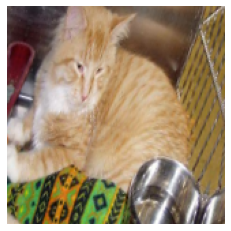

In [14]:
## Create rotated image with parameter 0.2
rotate2 = layers.RandomRotation(0.2)
example_rotated2 = rotate1(example, training = True)
plt.imshow(example_rotated2.numpy().astype("uint8"))
plt.axis("off")

Constrcut the model2, which adds the randomfilp and randomroation layer to model1

In [15]:
model2 = keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.1),

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Dense(64),
    layers.Flatten(),
    layers.Dense(2)
])

In [16]:
model2.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history2 = model2.fit(train_dataset,
                   epochs=20,
                   validation_data = validation_dataset
)

Epoch 1/20
63/63 [==============================] - 7s 81ms/step - loss: 94.0362 - accuracy: 0.4980 - val_loss: 1.0434 - val_accuracy: 0.5569
Epoch 2/20
63/63 [==============================] - 5s 82ms/step - loss: 0.8790 - accuracy: 0.5585 - val_loss: 0.8621 - val_accuracy: 0.5309
Epoch 3/20
63/63 [==============================] - 5s 82ms/step - loss: 0.7703 - accuracy: 0.5730 - val_loss: 0.8222 - val_accuracy: 0.5557
Epoch 4/20
63/63 [==============================] - 5s 80ms/step - loss: 0.7476 - accuracy: 0.5540 - val_loss: 0.7581 - val_accuracy: 0.5470
Epoch 5/20
63/63 [==============================] - 7s 114ms/step - loss: 0.7149 - accuracy: 0.5550 - val_loss: 0.7190 - val_accuracy: 0.5136
Epoch 6/20
63/63 [==============================] - 6s 83ms/step - loss: 0.7148 - accuracy: 0.5440 - val_loss: 0.7369 - val_accuracy: 0.5161
Epoch 7/20
63/63 [==============================] - 7s 100ms/step - loss: 0.7039 - accuracy: 0.5390 - val_loss: 0.7173 - val_accuracy: 0.5210
Epoch 8/20

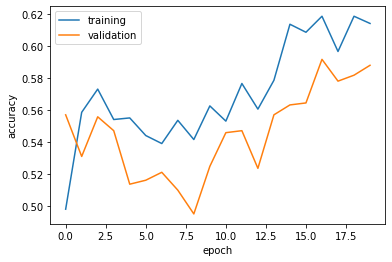

In [17]:
plt.plot(history2.history["accuracy"], label = "training")
plt.plot(history2.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

Observation1: the accuracy of model2 stabilized between **55% and 60%** during training  
Observation2: the accuracy is higher than the first model.  
Observation3: overfitting is not observed.

## Model3

Create a model with data preprocessing, which adds the prepocessor to the model 2.

In [18]:
i = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(i)
preprocessor = tf.keras.Model(inputs = [i], outputs = [x])

In [19]:
model3 = keras.Sequential([                       
    preprocessor,       

    layers.RandomFlip(),
    layers.RandomRotation(0.2),

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.AveragePooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(2)
    ])

In [20]:
model3.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history3 = model3.fit(train_dataset,
                   epochs=20,
                   validation_data = validation_dataset
)

Epoch 1/20
63/63 [==============================] - 7s 81ms/step - loss: 0.6983 - accuracy: 0.5245 - val_loss: 0.6876 - val_accuracy: 0.5037
Epoch 2/20
63/63 [==============================] - 5s 79ms/step - loss: 0.6738 - accuracy: 0.5630 - val_loss: 0.6384 - val_accuracy: 0.6089
Epoch 3/20
63/63 [==============================] - 5s 80ms/step - loss: 0.6554 - accuracy: 0.5945 - val_loss: 0.6457 - val_accuracy: 0.6238
Epoch 4/20
63/63 [==============================] - 6s 96ms/step - loss: 0.6363 - accuracy: 0.6265 - val_loss: 0.6156 - val_accuracy: 0.6770
Epoch 5/20
63/63 [==============================] - 5s 81ms/step - loss: 0.6279 - accuracy: 0.6460 - val_loss: 0.6250 - val_accuracy: 0.6485
Epoch 6/20
63/63 [==============================] - 5s 81ms/step - loss: 0.6083 - accuracy: 0.6630 - val_loss: 0.6078 - val_accuracy: 0.6621
Epoch 7/20
63/63 [==============================] - 6s 85ms/step - loss: 0.5964 - accuracy: 0.6780 - val_loss: 0.5864 - val_accuracy: 0.6881
Epoch 8/20
63

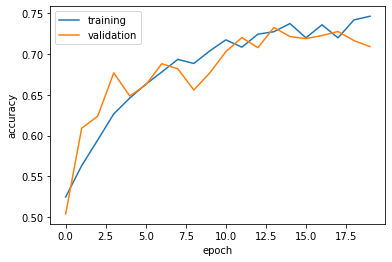

In [21]:
plt.plot(history3.history["accuracy"], label = "training")
plt.plot(history3.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

Observation1: the accuracy of model3 stabilized between **70% and 75%** during training  
Observation2: the accuracy is much higher than the first model.  
Observation3: overfitting is not observed.

## Model4

Create a model with transfer learning, which has a preprocessor layer, randomflip and randomrotation layer, base model layer, a MaxPooling2D layer, a dropout layer and a dense layer.

In [22]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

i = tf.keras.Input(shape=IMG_SHAPE)
x = base_model(i, training = False)
base_model_layer = tf.keras.Model(inputs = [i], outputs = [x])

9420800/9406464 [==============================] - 0s 0us/step


In [23]:
model4 = keras.Sequential([
    preprocessor,       

    layers.RandomFlip(),
    layers.RandomRotation(0.2),

    base_model_layer,

    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.2),
    layers.Dense(2)
    ])

In [24]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 160, 160, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 160, 160, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 160, 160, 3)      0         
 tation)                                                         
                                                                 
 model_1 (Functional)        (None, 5, 5, 1280)        2257984   
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 1280)             

There are more than 2 million parameters to train in this model.

In [25]:
model4.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
history4 = model4.fit(train_dataset,
                   epochs=20, # how many rounds of training to do
                   validation_data = validation_dataset
)

Epoch 1/20
63/63 [==============================] - 11s 114ms/step - loss: 1.0712 - accuracy: 0.7495 - val_loss: 0.1669 - val_accuracy: 0.9517
Epoch 2/20
63/63 [==============================] - 6s 86ms/step - loss: 0.5815 - accuracy: 0.8620 - val_loss: 0.1806 - val_accuracy: 0.9505
Epoch 3/20
63/63 [==============================] - 6s 87ms/step - loss: 0.5446 - accuracy: 0.8710 - val_loss: 0.1217 - val_accuracy: 0.9653
Epoch 4/20
63/63 [==============================] - 6s 91ms/step - loss: 0.4574 - accuracy: 0.8765 - val_loss: 0.0946 - val_accuracy: 0.9666
Epoch 5/20
63/63 [==============================] - 6s 86ms/step - loss: 0.4618 - accuracy: 0.8770 - val_loss: 0.0819 - val_accuracy: 0.9678
Epoch 6/20
63/63 [==============================] - 6s 86ms/step - loss: 0.4185 - accuracy: 0.8915 - val_loss: 0.1171 - val_accuracy: 0.9641
Epoch 7/20
63/63 [==============================] - 6s 95ms/step - loss: 0.3888 - accuracy: 0.8975 - val_loss: 0.1170 - val_accuracy: 0.9604
Epoch 8/20


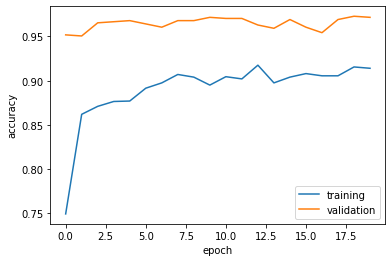

In [26]:
plt.plot(history4.history["accuracy"], label = "training")
plt.plot(history4.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

Observation1: the accuracy of model3 stabilized at **90% to 95%** during training  
Observation2: the accuracy is much higher than the first model.  
Observation3: overfitting is observed.

## Test model4

Model4 has the highest accuracy, we apply the model to the test_dataset.

In [27]:
model4.evaluate(test_dataset)

6/6 [==============================] - 1s 54ms/step - loss: 0.0896 - accuracy: 0.9583


[0.08964353799819946, 0.9583333134651184]

We have an accuracy of 95 percent! 